In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [10]:
def plot_BarChart(f1, auc, y_min, y_max):
    """
    绘制柱状图，展示同一模型的不同变体（如去除某模块的模型）在 F1-Macro 和 AUC 两个指标上的性能差异

    参数：
    f1：字典，键为模型变体名称，值为单个数值，代表该模型的 F1-Macro 。
    auc：字典，键为模型变体名称，需与f1的键完全一致，值为单个数值，代表该模型的 AUC 。
    y_min：数值，Y 轴的最小值。
    y_max：数值，Y 轴的最大值。

    配色：
    F1_color = '#8FDEE3'    # 蓝
    AUC_color = '#F78779'   # 橙
    """
   # 设置Times New Roman字体
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['axes.unicode_minus'] = False
    
    methods = list(f1.keys())
    f1_scores = [f1[m] for m in methods]
    auc_scores = [auc[m] for m in methods]
    
    # 配色
    F1_color = '#8FDEE3'    # 蓝
    AUC_color = '#F78779'   # 橙
    
    # 创建画布：两行，第一行画图例，第二行画柱状图
    fig = plt.figure(figsize=(12, 8), dpi=200)
    gs = fig.add_gridspec(2, 1, height_ratios=[0.15, 0.85], hspace=0.05)
    
    # 上半部分：手动画图例
    ax_leg = fig.add_subplot(gs[0])
    ax_leg.axis('off')
    ax_leg.set_xlim(0, 1)
    ax_leg.set_ylim(0, 1)
    # 图例位置和大小
    x_start = 0.3
    y_center = 0.5
    patch_w, patch_h = 0.05, 0.3
    # F1 图例
    ax_leg.add_patch(Rectangle((x_start, y_center - patch_h/2), patch_w, patch_h, color=F1_color))
    ax_leg.text(x_start + patch_w + 0.02, y_center, 'F1-Macro', fontsize=30, va='center')
    # AUC 图例
    ax_leg.add_patch(Rectangle((x_start + 0.3, y_center - patch_h/2), patch_w, patch_h, color=AUC_color))
    ax_leg.text(x_start + 0.3 + patch_w + 0.02, y_center, 'AUC', fontsize=30, va='center')
    
    # 下半部分：绘制柱状图
    ax = fig.add_subplot(gs[1])
    x = np.arange(len(methods))
    width = 0.35
    bars1 = ax.bar(x - width/2, f1_scores, width, color=F1_color)
    bars2 = ax.bar(x + width/2, auc_scores, width, color=AUC_color)
    
    # 坐标及标签
    ax.set_xticks(x)
    ax.tick_params(axis='y',
                   labelsize=25)     # 文字颜色（可选）
    ax.set_xticklabels(methods, rotation=45, ha='right', fontsize=30)
    ax.set_ylabel('Score (%)', fontsize=30)
    ax.set_ylim(y_min, y_max)
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    
    # 添加数值标签
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=24)
    
    fig.savefig('BarChart.pdf', format='pdf', dpi=300, bbox_inches='tight')
    plt.show()

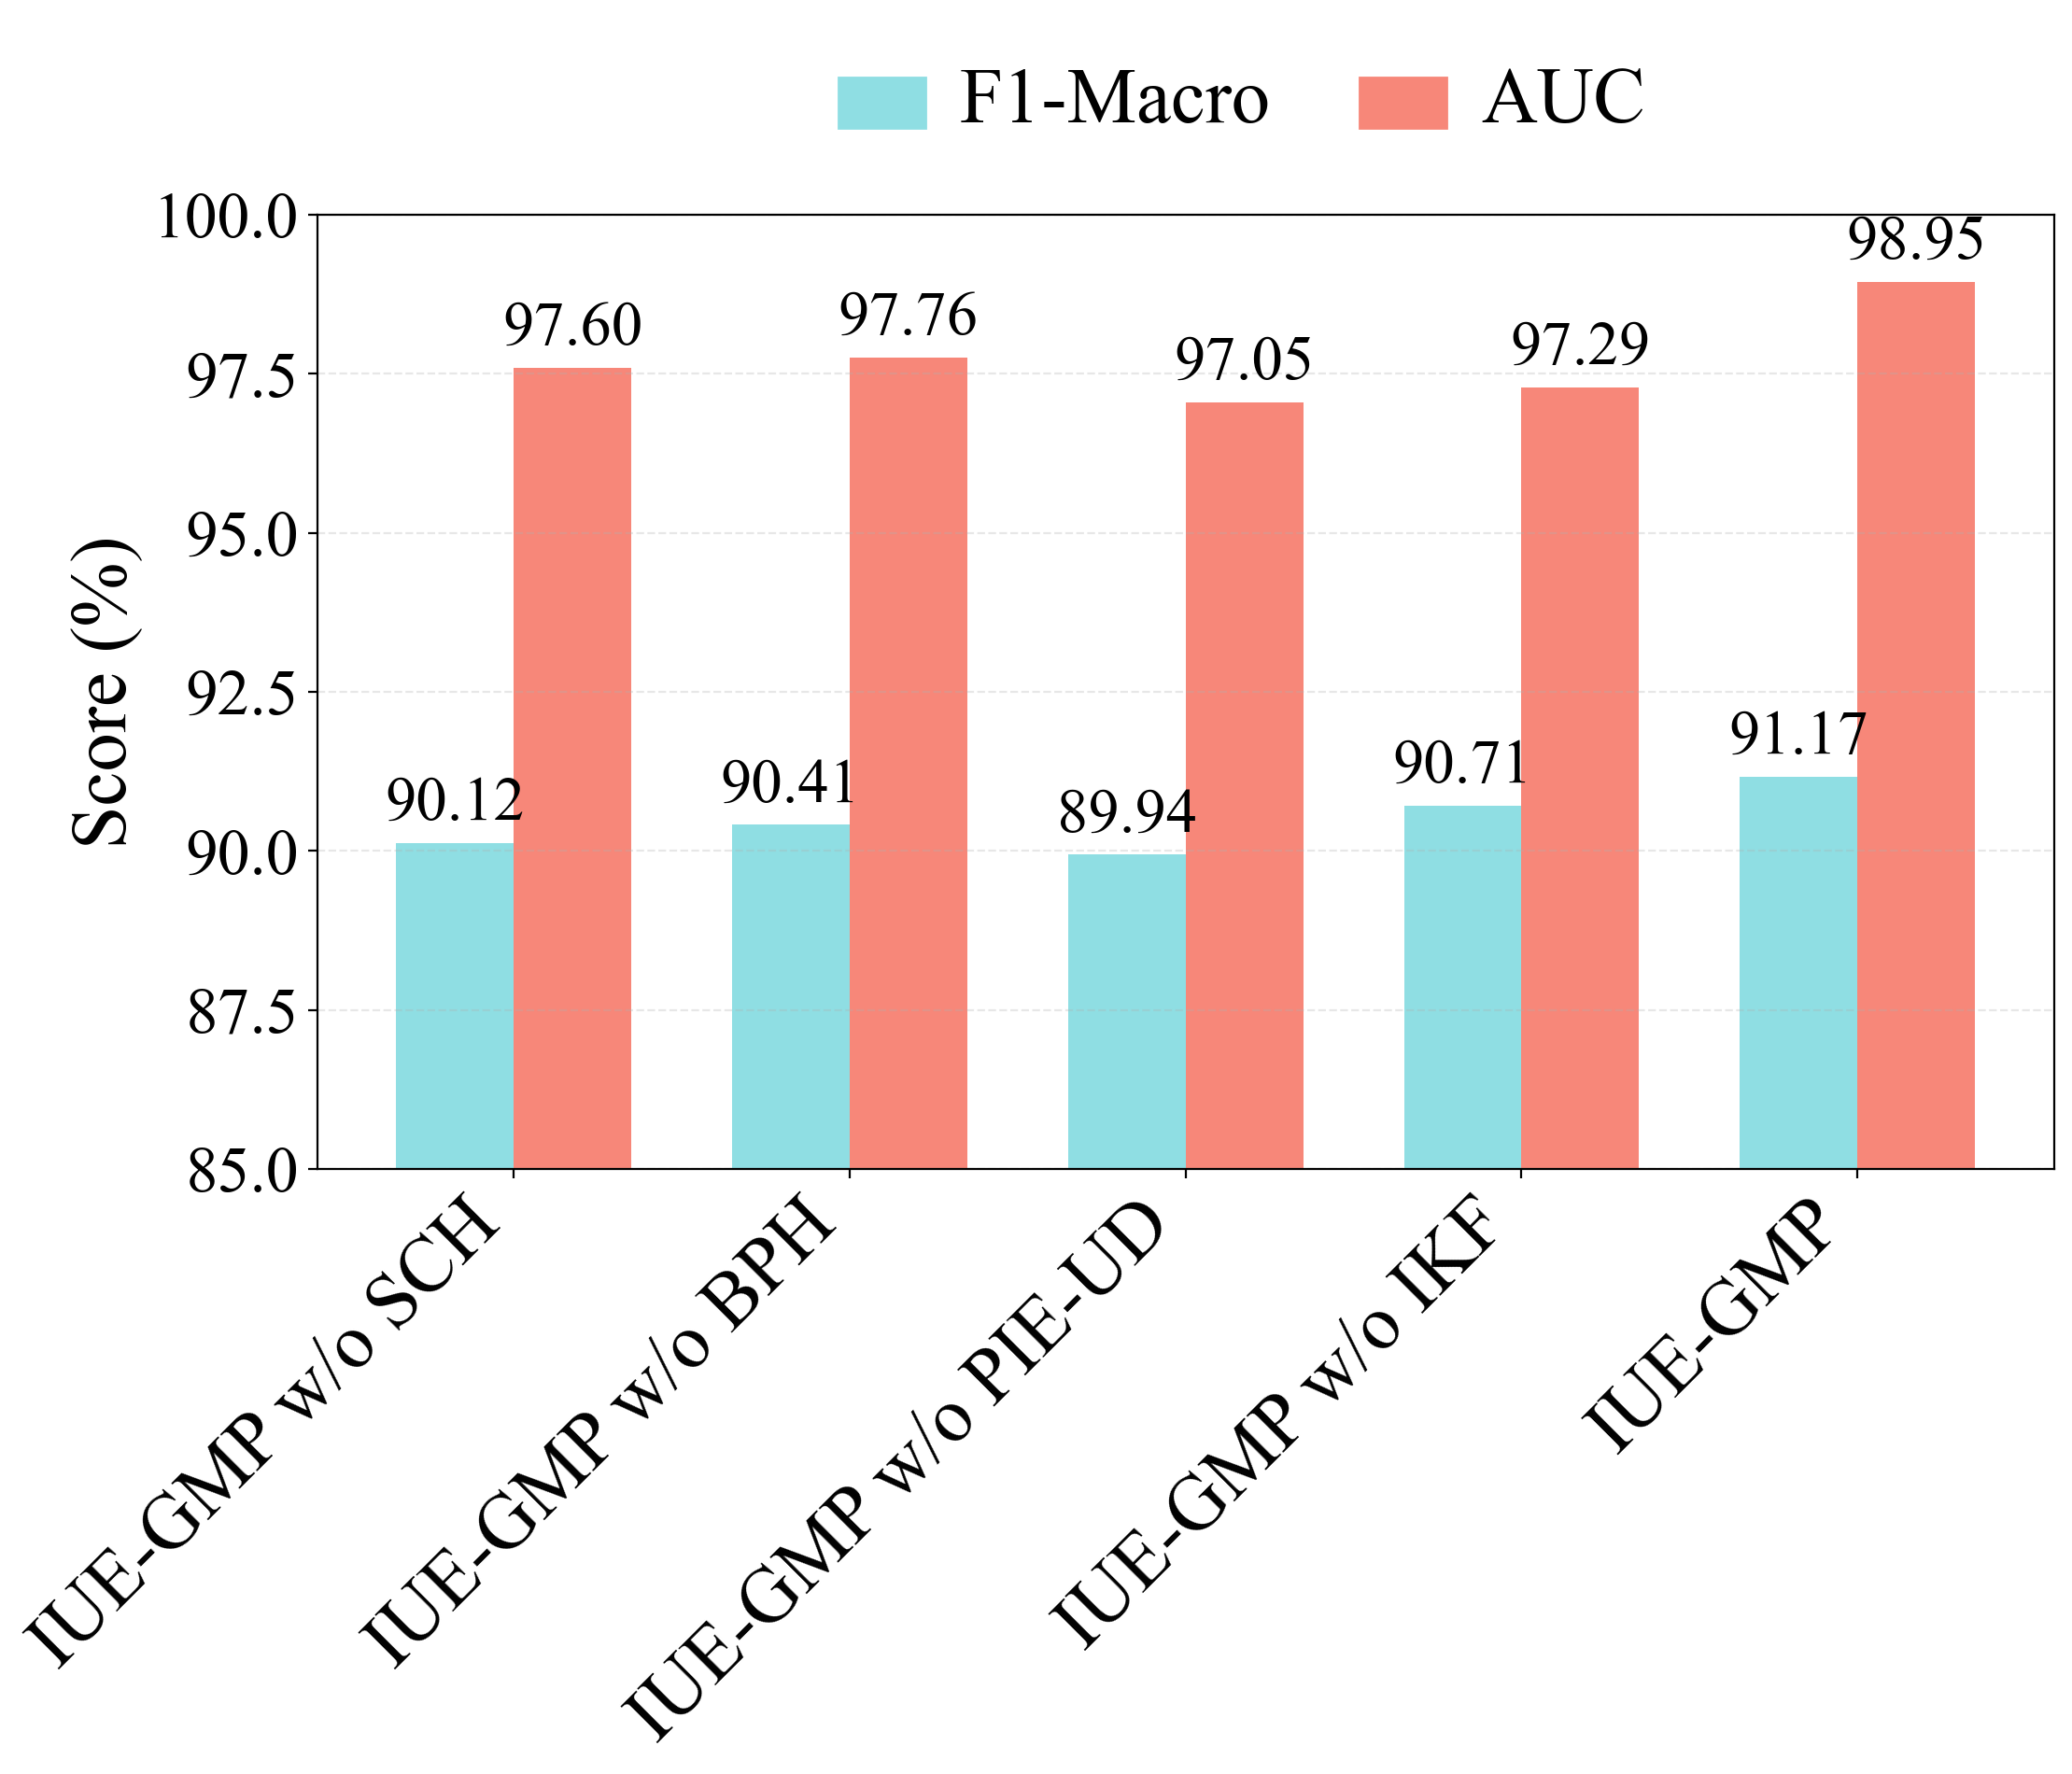

In [7]:
f1_data1={
    'IUE-GMP w/o SCH':90.12,
    'IUE-GMP w/o BPH':90.41,
    'IUE-GMP w/o PIE-UD':89.94,
    'IUE-GMP w/o IKF':90.71,
    'IUE-GMP':91.17
}

auc_data1={
    'IUE-GMP w/o SCH':97.60,
    'IUE-GMP w/o BPH':97.76,
    'IUE-GMP w/o PIE-UD':97.05,
    'IUE-GMP w/o IKF':97.29,
    'IUE-GMP':98.95
}
plot_BarChart(f1_data1,auc_data1, 85, 100)

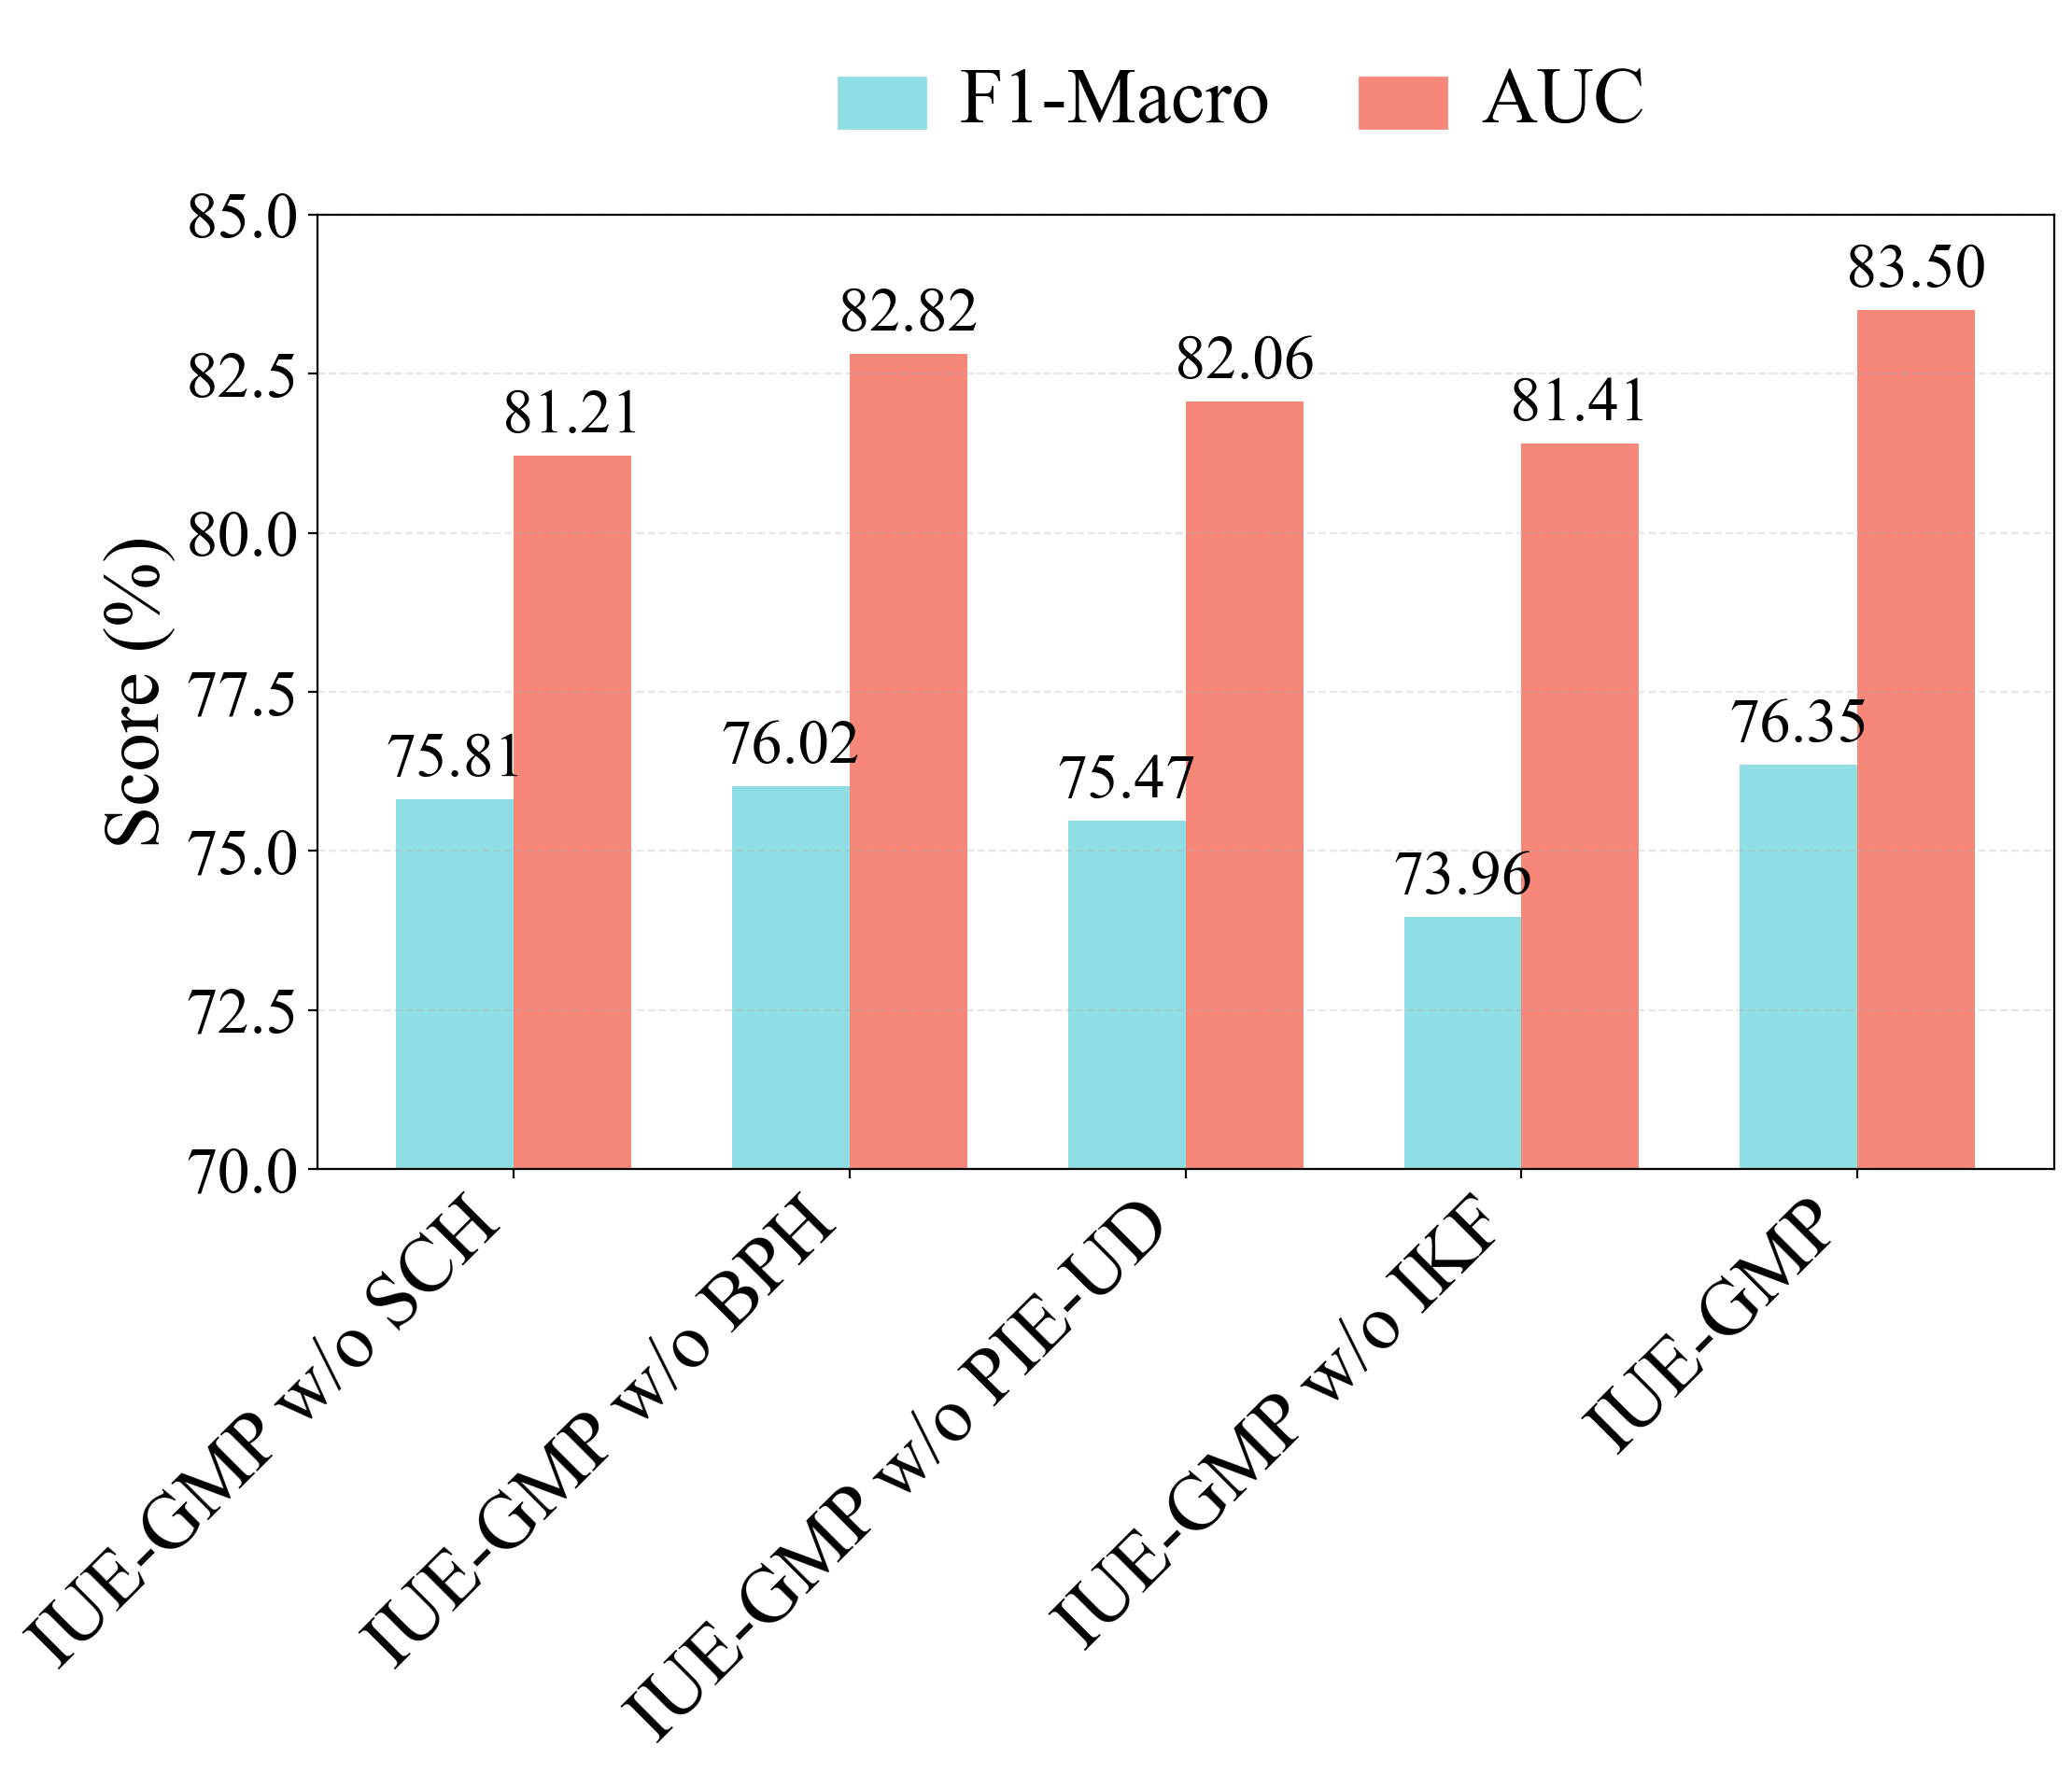

In [8]:
f1_data2={
    'IUE-GMP w/o SCH':75.81,
    'IUE-GMP w/o BPH':76.02,
    'IUE-GMP w/o PIE-UD':75.47,
    'IUE-GMP w/o IKF':73.96,
    'IUE-GMP':76.35
}

auc_data2={
    'IUE-GMP w/o SCH':81.21,
    'IUE-GMP w/o BPH':82.82,
    'IUE-GMP w/o PIE-UD':82.06,
    'IUE-GMP w/o IKF':81.41,
    'IUE-GMP':83.50
}
plot_BarChart(f1_data2,auc_data2, 70, 85)

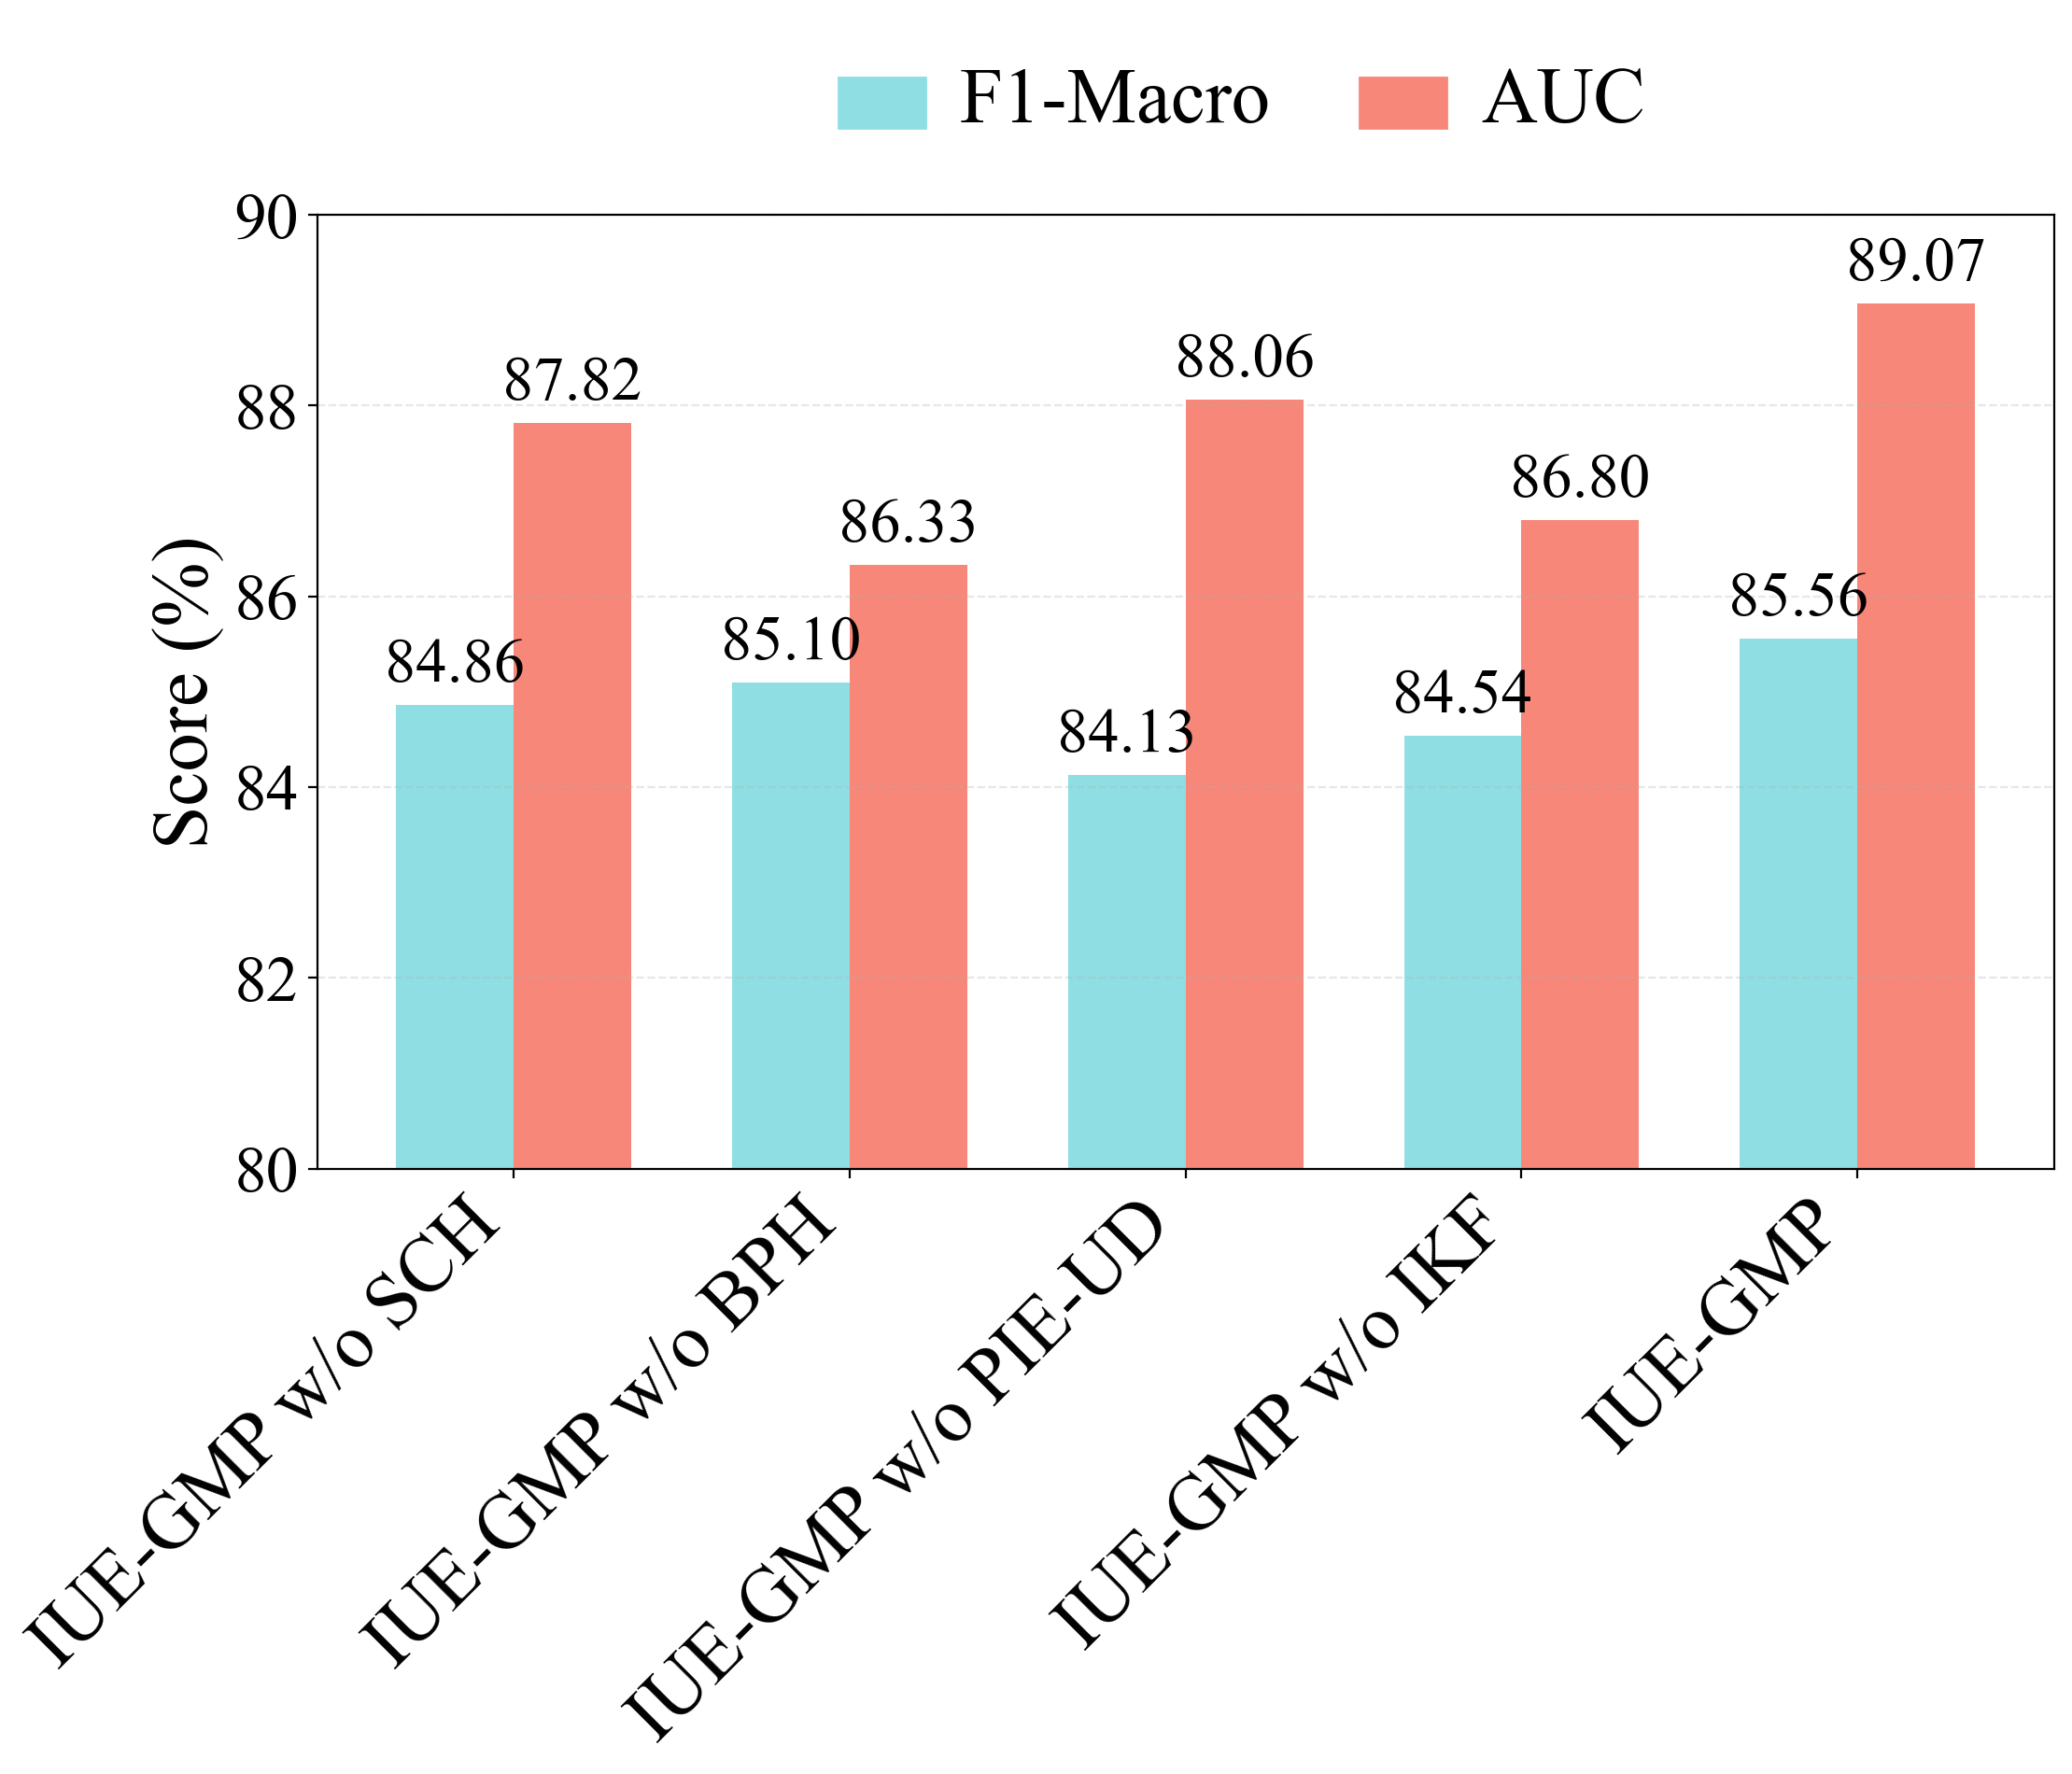

In [9]:
f1_data3={
    'IUE-GMP w/o SCH':84.86,
    'IUE-GMP w/o BPH':85.10,
    'IUE-GMP w/o PIE-UD':84.13,
    'IUE-GMP w/o IKF':84.54,
    'IUE-GMP':85.56
}

auc_data3={
    'IUE-GMP w/o SCH':87.82,
    'IUE-GMP w/o BPH':86.33,
    'IUE-GMP w/o PIE-UD':88.06,
    'IUE-GMP w/o IKF':86.80,
    'IUE-GMP':89.07
}
plot_BarChart(f1_data3,auc_data3,80,90)